IndexError: index 1 is out of bounds for axis 0 with size 1

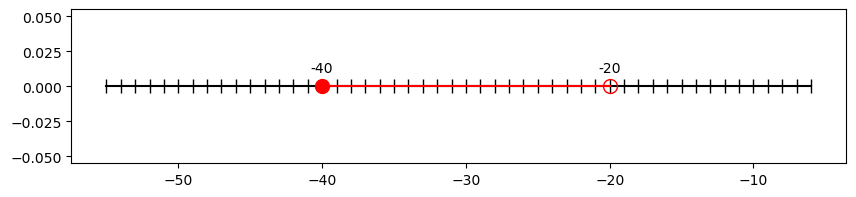

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_real_numbers(selection, notation=None):
    """
    Plot a horizontal line with selected values and their distance.
    :param selection: A list or array of two real numbers representing the interval.
        This function will plot the interval and annotate the midpoint, radius, and distance between the two values.
        It will also plot the range of values between the two selected numbers.
    :param notation: String. Optional, used when needing to visualize the interval in a specific notation.
        Use "-" to represent an infinite interval, e.g., "-oo-" for (-∞, ∞)
        Use "U" to represent the union of intervals, e.g., "U" for (-∞, a) U (b, ∞)
        Example: "cc" for closed interval [a,b],    
                "oo" for open interval (a,b),
                "oc" for half-open interval [a,b),
                "co" for half-open interval (a,b],
                "-oo-" for infinite interval (-∞, ∞),
                "-oo" for (-∞, b),
                "oo-" for (a, ∞),
                "-oc" for (-∞, b],
                "co-" for [a, ∞),
                "-ooUoo-" for (-∞, b) U (c, ∞),
                "-ocUco-" for (-∞, b] U [c, ∞),
    :raises ValueError: If the selection does not contain exactly two values.
    :raises ValueError: If the notation is not one of the specified notations.
    :return: None. Displays a plot with the interval and annotations.
    
    Updated: 
        - 2025-08-20: Created the function.
    
    """
    if notation not in (None, "cc", "oo", "oc", "co", "-oo-", "-oo", "oo-", "-oc", "co-", "-ooUoo-", "-ocUco-"):
        raise ValueError("Invalid notation provided. Use None or one of the specified notations.")

    if notation is None:
        if len(selection) != 2:
            raise ValueError("Selection must contain exactly two values.")
        values = np.sort(np.array(selection))

        mid_selection = np.mean(selection)
        range_values = [*range(int(np.min(values)-np.abs(np.mean(values)*0.50)), int(np.max(values)+np.abs(np.mean(values)*0.50)))]

        fig, ax = plt.subplots(figsize=(10, 2))

        # Annotate each value on the x-axis
        for i, value in enumerate(values):
            ax.annotate(str(value), (value, 0), textcoords="offset points", xytext=(0,10), ha='center')

        ax.plot(range_values, [0] * len(range_values), linestyle="", marker='|', markersize=10, color='black')

        ax.plot(range_values, [0] * len(range_values), linestyle=None, color='black')
        ax.plot(values, [0] * len(values), linestyle='-', marker='o', markersize=10, color='red')

        ax.annotate(f"{selection[0]}", (selection[0], 1), textcoords="offset points", xytext=(0,10), ha='center', color='Black')
        ax.annotate(f"{selection[1]}", (selection[1], 1), textcoords="offset points", xytext=(0,10), ha='center', color='Black')
        ax.annotate(f'Distance: {np.abs(selection[1]-selection[0])}', (mid_selection, 1), textcoords="offset points", xytext=(0,15), ha='center', color='Black')
        ax.plot(selection, [1] * len(selection), linestyle='-', marker='|', markersize=10, color='Black')

        ax.set_ylim(-1, 2)
        ax.set_yticklabels([])

        # Plot the midpoint
        ax.annotate(f'Midpoint: {mid_selection}', (mid_selection, 1), textcoords="offset points", xytext=(0,25), ha='center', color='Blue')
        ax.plot([mid_selection], [1], marker='o', markersize=10, color='Blue')

        # Plot the radius
        ax.annotate(f'Radius: {np.abs(selection[1]-selection[0])/2}', (mid_selection, 1), textcoords="offset points", xytext=(0,-15), ha='center', color='Green')
        ax.plot([mid_selection - np.abs(selection[1]-selection[0])/2, mid_selection + np.abs(selection[1]-selection[0])/2], [1, 1], linestyle='--', color='Green')

        # Add the title and labels
        ax.set_title(f'Defining [{selection[0]}, {selection[1]}] as an interval')

        plt.show()
    
    elif notation in ("cc", "oo", "oc", "co"):
        if len(selection) != 2:
            raise ValueError("Selection must contain exactly two values if using 'cc', 'oo', 'oc', or 'co' notation.")
        if notation[0] == "c":
            left_marker_facecolor = "red"
        else:
            left_marker_facecolor = "none"
        if notation[1] == "c":
            right_marker_facecolor = "red"
        else:
            right_marker_facecolor = "none"
        
        values = np.array(selection)

        mid_selection = np.mean(selection)
        range_values = [*range(int(np.min(values)-np.abs(np.mean(values)*0.50)), int(np.max(values)+np.abs(np.mean(values)*0.50)))]

        fig, ax = plt.subplots(figsize=(10, 2))

        # Annotate each value on the x-axis
        for i, value in enumerate(values):
            ax.annotate(str(value), (value, 0), textcoords="offset points", xytext=(0,10), ha='center')

        ax.plot(range_values, [0] * len(range_values), linestyle="", marker='|', markersize=10, color='black')

        ax.plot(range_values, [0] * len(range_values), linestyle=None, color='black')
        ax.plot(values, [0] * len(values), linestyle='-', marker=None, color='red')

        ax.plot(values[0], 0, linestyle='-', marker='o', markersize=10, color='red', markerfacecolor=left_marker_facecolor)
        ax.plot(values[1], 0, linestyle='-', marker='o', markersize=10, color='red', markerfacecolor=right_marker_facecolor)

        ax.annotate(f"{selection[0]}", (selection[0], 1), textcoords="offset points", xytext=(0,10), ha='center', color='Black')
        ax.annotate(f"{selection[1]}", (selection[1], 1), textcoords="offset points", xytext=(0,10), ha='center', color='Black')
        ax.annotate(f'Distance: {np.abs(selection[1]-selection[0])}', (mid_selection, 1), textcoords="offset points", xytext=(0,15), ha='center', color='Black')
        ax.plot(selection, [1] * len(selection), linestyle='-', marker='|', markersize=10, color='Black')

        ax.set_ylim(-1, 2)
        ax.set_yticklabels([])

        # Plot the midpoint
        ax.annotate(f'Midpoint: {mid_selection}', (mid_selection, 1), textcoords="offset points", xytext=(0,25), ha='center', color='Blue')
        ax.plot([mid_selection], [1], marker='o', markersize=10, color='Blue')

        # Plot the radius
        ax.annotate(f'Radius: {np.abs(selection[1]-selection[0])/2}', (mid_selection, 1), textcoords="offset points", xytext=(0,-15), ha='center', color='Green')
        ax.plot([mid_selection - np.abs(selection[1]-selection[0])/2, mid_selection + np.abs(selection[1]-selection[0])/2], [1, 1], linestyle='--', color='Green')

        # Add the title and labels
        ax.set_title(f'Defining [{selection[0]}, {selection[1]}] as an interval')

        plt.show()
    
    elif notation in ("oo-", "co-"):
        pass
    
    elif notation in ("-oo", "-oc"):
        pass

    elif notation in ("-oo-"):
        pass

    elif notation in ("-ooUoo-", "-ocUco-"):
        pass

values = np.random.randint(-25, 25, size=1)

plot_real_numbers(values, notation="co-")
